<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

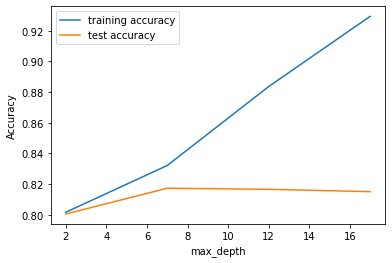

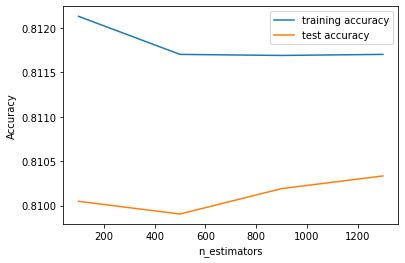

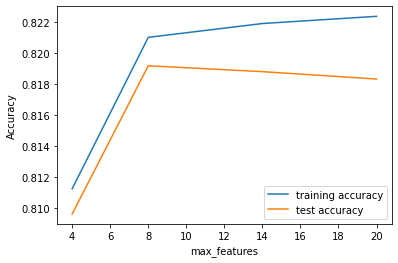

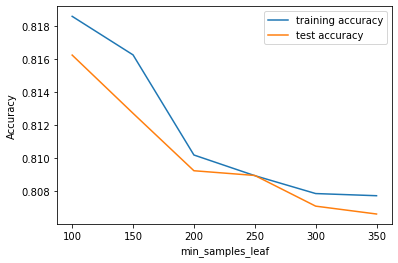

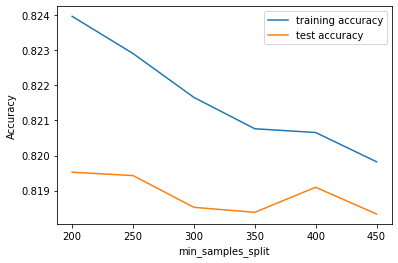

Fitting 3 folds for each of 72 candidates, totalling 216 fits


KeyboardInterrupt: 

In [5]:
#!/usr/bin/env python
# coding: utf-8

# ## Credit Default Prediction

# ###### Overview
# We will build a random forest model to predict whether a given customer defaults or not. Credit default is one of the most important problems in the banking and risk analytics industry. There are various attributes which can be used to predict default, such as demographic data (age, income, employment status, etc.), (credit) behavioural data (past loans, payment, number of times a credit payment has been delayed by the customer etc.).
# 

# ##### Dataset Information
# This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

# ##### There are 25 variables:
# 
# - **ID**: ID of each client
# - **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
# - **SEX**: Gender (1=male, 2=female)
# - **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# - **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
# - **AGE**: Age in years
# - **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
# - **PAY_2**: Repayment status in August, 2005 (scale same as above)
# - **PAY_3**: Repayment status in July, 2005 (scale same as above)
# - **PAY_4**: Repayment status in June, 2005 (scale same as above)
# - **PAY_5**: Repayment status in May, 2005 (scale same as above)
# - **PAY_6**: Repayment status in April, 2005 (scale same as above)
# - **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
# - **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
# - **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
# - **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
# - **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
# - **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
# - **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
# - **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
# - **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
# - **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
# - **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
# - **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
# - **default.payment.next.month**: Default payment (1=yes, 0=no)

# <hr>

# ### Data Understanding and Cleaning

# In[63]:


# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


# In[64]:

#ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,
#BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()


# In[65]:


# Let's understand the type of columns
df.info()


# In[66]:


df.SEX.value_counts()


# In[67]:


df.EDUCATION.value_counts()


# As per data dictionary there are 5 categories 1 to 5 for Education column and 5 and 6 are both showing as 'UNKNOWN'. There is no **0** category in the dictionary but present in dataset.
# - Hence Combining `0, 5, and 6` together as **'UNKNOWN'** category. Changing all `6 and 0` to `5`.

# In[68]:


df['EDUCATION'].replace([0, 6], 5, inplace=True)


# In[69]:


df.EDUCATION.value_counts()


# In[70]:


df.MARRIAGE.value_counts()


# As per data dictionary there are 3 categories 1 to 3 for Marriage column but **0** category present in dataset.
# - Hence Combining `0` as **'Others'** category. Changing all `0` to `3`.

# In[71]:


df['MARRIAGE'].replace(0, 3, inplace=True)


# In[72]:


df.MARRIAGE.value_counts()


# In[73]:


df.PAY_2.value_counts()


# In[74]:


df.PAY_0.value_counts()


# In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

# <hr>

# ### Data Preparation and Model Building

# In[75]:


# Dropping id column as it's no use
df.drop('ID',axis=1, inplace=True)


# In[76]:


# Putting feature variable to X
X = df.drop('defaulted',axis=1)

# Putting response variable to y
y = df['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


# 
# 
# #### Default Hyperparameters
# Let's first fit a random forest model with default hyperparameters.

# In[77]:


# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train,y_train)


# In[78]:


# Making predictions
predictions = rfc.predict(X_test)


# In[79]:


# Let's check the report of our default model
print(classification_report(y_test,predictions))

# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))


# So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

# <hr>

# ### Hyperparameter Tuning

# The following hyperparameters are present in a random forest classifier. We will tune each parameters
# 
# 
# - **n_estimators** 
# - **criterion**
# - **max_features** 
# - **max_depth**
# - **min_samples_split**
# - **min_samples_leaf**
# - **min_weight_fraction_leaf**
# - **max_leaf_nodes**
# - **min_impurity_split**

# <hr>

# ### Tuning max_depth

# Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.
# 

# In[80]:


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)


# In[81]:


# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()


# In[82]:


# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.
# 
# Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

# <hr>

# ### Tuning n_estimators

# Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
# <br>
# 

# In[83]:


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)


# In[84]:


# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()


# In[85]:


# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# <hr>

# ### Tuning max_features
# 
# Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

# In[86]:


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)


# In[87]:


# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()


# In[88]:


# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

# ### Tuning min_samples_leaf

# The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
# - If int, then consider min_samples_leaf as the minimum number.
# - If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

# Let's now check the optimum value for min samples leaf in our case.

# In[89]:


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)


# In[90]:


# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()


# In[91]:


# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# You can see that the model starts of overfit as you decrease the value of min_samples_leaf. 

# ### Tuning min_samples_split
# 
# Let's now look at the performance of the ensemble as we vary min_samples_split.

# In[92]:


# GridSearchCV to find optimal min_samples_split
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train, y_train)


# In[93]:


# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()


# In[94]:


# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# <hr>

# ### Grid Search to Find Optimal Hyperparameters

# We can now find the optimal hyperparameters using GridSearchCV.

# In[95]:


# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)


# In[96]:


# Fit the grid search to the data
grid_search.fit(X_train, y_train)


# In[97]:


# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)


# In[98]:


type(grid_search.best_params_)


# **Fitting the final model with the best parameters obtained from grid search.**

# In[104]:


# model with the best hyperparameters

rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)


# In[105]:


# fit
rfc.fit(X_train,y_train)


# In[106]:


# predict
predictions = rfc.predict(X_test)


# In[107]:


# Let's check the report of our default model
print(classification_report(y_test,predictions))

# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

print(accuracy_score(y_test,predictions))


# In[108]:


# Saving the model to disk
pickle.dump(rfc, open('model.pkl', 'wb'))
